In [1]:
%matplotlib inline

## Supervised learning

We have the human operator labels for our data, so we can train models to predict these labels instead of using them only to check our model.

Examples of supervised learning include linear regression, support vector machines, neural networks (including deep learning), and more.

The simplest possible supervised learning model for our classification problems is a [k-nearest-neighbors classifier](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) (kNN).

kNN assigns labels based on the labels of a sample's *k* nearest neighbors. Let's try it out!

In [2]:
import pandas as pd

df = pd.read_csv("pellets-visual-classes-rgb.csv", index_col="image").dropna()
df["yellowing index"] = df["yellowing index"].astype(int)

We already know that the size is mostly random so let's drop it here.

In [3]:
feature_columns = ["r", "g", "b"]
X = df[feature_columns].values

y = df["yellowing"].values

In [4]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(X, y)
prediction = knn.predict(X)
prediction

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high',
       'low', 'low', 'very high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'moderate', 'high', 'high',
       'low', 'moderate', 'low', 'low', 'moderate', 'low', 'moderate',
       'low', 'low', 'moderate', 'moderate', 'low', 'high', 'low', 'high',
       'moderate', 'high', 'low', 'moderate', 'high', 'low', 'moderate',
       'low', 'high', 'high', 'low', 'high', 'low', 'high', 'low', 'high',
       'high', 'high', 'low', 'low', 'high', 'moderate', 'moderate',
       'very high', 'low', 'low', 'low', 'low', 'low', 'low', 'moderate',
       'low', 'low', 'low', 'low', 'low', 'low', 'moderate', 'low',
       'moderate', 'high', 'high', 'high', 'high', 'high', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'moderate', 'moderate', 'high', 'moderate', 'low', 'high',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low

In [5]:
from sklearn import metrics

metrics.accuracy_score(y, prediction)

0.8267716535433071

Quite the improvement from our k-means attempt. Aren't we forgeting anything though? Yes, we should always standardize the data!

In [6]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [7]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_scaled, y)
prediction_scaled = knn.predict(X_scaled)

metrics.accuracy_score(y, prediction_scaled)

0.7795275590551181

The lower score means that we where overfitting before standardizing. Still, ~78% is much better than our k-means.

In [8]:
import seaborn as sns

/home/filipe/micromamba/envs/ML/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


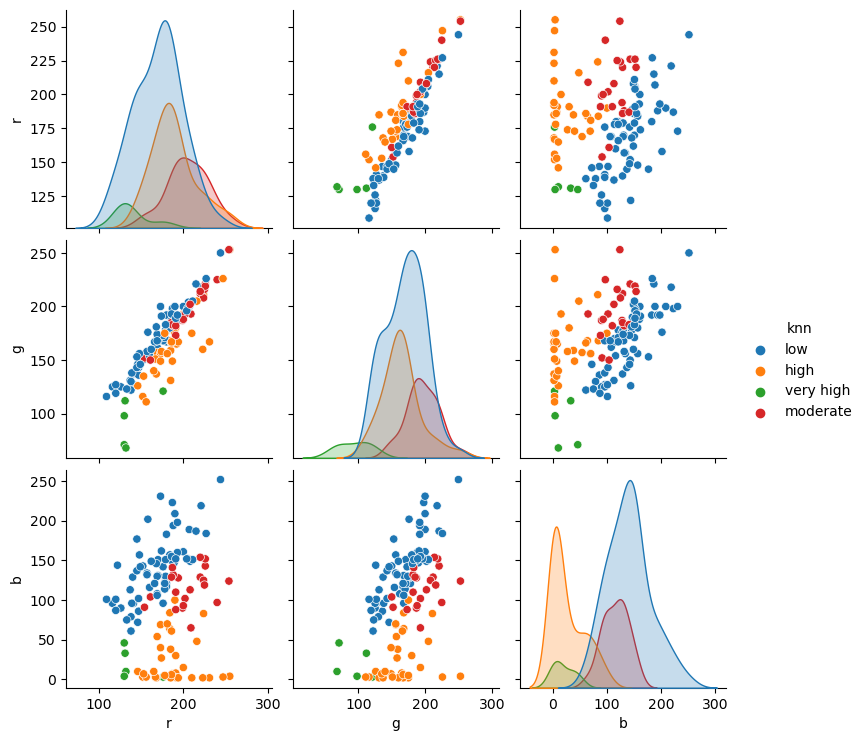

In [9]:
redux = df[["r", "g", "b", "yellowing"]]
redux = redux.assign(knn=prediction_scaled)

sns.pairplot(redux, hue="knn", vars=feature_columns);

How can we stop forgetting to standardize the data? Well, scikit-learn is awesome and has our back. We can create data processing pipelines and keep all the steps of our model in a single object. Pipelines are very robust and may contain custom steps if your data requires them

In [10]:
from sklearn import pipeline

classifier = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    neighbors.KNeighborsClassifier(),
)

classifier.fit(X, y)
prediction_pipeline = classifier.predict(X)

metrics.accuracy_score(y, prediction_pipeline)

0.7795275590551181

# Validation

In [11]:
from sklearn import model_selection

split = model_selection.train_test_split(X, y)

X_train, X_test, y_train, y_test = split

X_train.shape, X_test.shape

((95, 3), (32, 3))

In [12]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [13]:
metrics.accuracy_score(y_test, classifier.predict(X_test))

0.71875

In [14]:
scores = model_selection.cross_val_score(classifier, X, y)
scores

array([0.69230769, 0.65384615, 0.84      , 0.68      , 0.72      ])

In [15]:
scores.mean()

0.7172307692307692

We reduce our accuracy when performing a test/train split. Why that happened? The first guess is that our model may be "data hungry." We just don't have enough samples on each class to predict them.

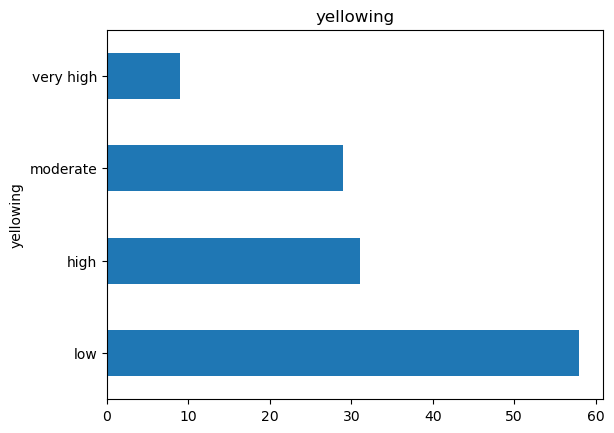

In [16]:
df["yellowing"].value_counts().plot.barh(title="yellowing");

The data is unbalanced! That can we do next?

- Try to balance the current data;
- Collect more data and see if the dataset balance itself out;
- Choose a technique that is more robust to unbalanced data, like Decision Trees (DT).

PS: Check this [awesome paper](https://hal.archives-ouvertes.fr/hal-03723551) on DTs.